In [1]:
from skimage.io import imread, imshow, imsave
import numpy as np
from skimage import img_as_float
import copy
import random
import math
img = imread('img.jpg')


In [2]:
def dobavkaIzobrazheniya(img, n,m):
    return np.pad(img, ((n,n),(m,m),(0,0)), 'mean') 

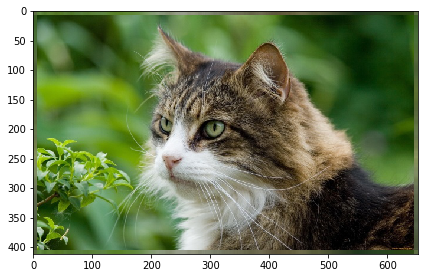

In [37]:
imshow(dobavkaIzobrazheniya(img, 6,6))

In [4]:
def box_filterAlgoritm(channel, n,m):
    sum = 0
    ret = copy.copy(channel)
    height = channel.shape[0]
    width = channel.shape[1]
    for i in range(height-n//2-(n-1)): #вычитаем эти штуки чтобы не выходил массив за пределы
        for j in range(width-m//2-(m-1)):
            for k in range(n):
                for l in range(m):
                    sum+=channel[i+k][j+l] #суммируем то что было в матрице
            ret[i+k+n//2][j+l+m//2]=sum//(n*m) #пишем среднее арифметичесое суммы в серединный пиксель матрицы
            sum = 0
    return ret

In [5]:
def box_filter(img,n,m):
    img2 = dobavkaIzobrazheniya(img, n//2,m//2)
    
    
    r = box_filterAlgoritm(img2[:,:,0],n,m)
    g = box_filterAlgoritm(img2[:,:,1],n,m)
    b = box_filterAlgoritm(img2[:,:,2],n,m)
    
    return np.dstack((r,g,b))

Wall time: 14.6 s


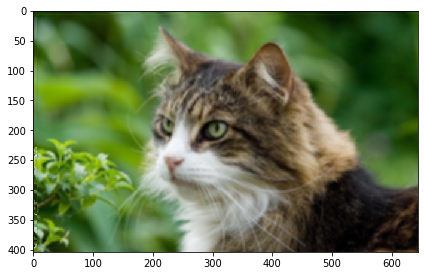

In [38]:
%%time
imshow(box_filter(img,5,5))

In [7]:
def median_filter(img, n,m):
    img2 = dobavkaIzobrazheniya(img, n//2,m//2)   
    
    r = median_filterAlgoritm(img2[:,:,0],n,m)
    g = median_filterAlgoritm(img2[:,:,1],n,m)
    b = median_filterAlgoritm(img2[:,:,2],n,m)
    
    return np.dstack((r,g,b))

In [8]:
def median_filterAlgoritm(channel, n,m):
    list = []
    ret = copy.copy(channel)
    height = channel.shape[0]
    width = channel.shape[1]
    for i in range(height-n//2-(n-1)): #вычитаем эти штуки чтобы не выходил массив за пределы
        for j in range(width-m//2-(m-1)):
            for k in range(n):
                for l in range(m):
                    list.append(channel[i+k][j+l])
            list = sorted(list)
            ret[i+k+n//2][j+l+m//2]=list[len(list)//2] 
            list.clear()
    return ret

Wall time: 13.6 s


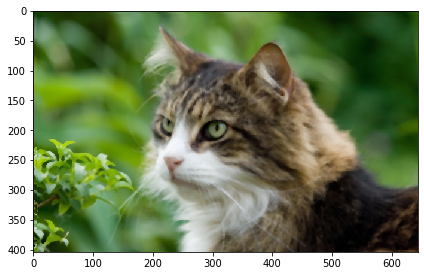

In [39]:
%%time
imshow(median_filter(img,5,5))

In [10]:
def CalculateMatrixGauss(length, weight):
    
    Kernel = [[0 for x in range(length)] for y in range(length)]
    sumTotal = 0
    kernelRadius = length // 2
    distance = 0.0
    calculatedEuler = 1.0 / (2.0 * math.pi * (weight**2))
    for filterY in range(-kernelRadius, kernelRadius+1):
        for filterX in range(-kernelRadius, kernelRadius+1):
            distance = ((filterX * filterX) + (filterY * filterY)) /  (2 * (weight * weight))
            Kernel[filterY + kernelRadius][filterX + kernelRadius] =  calculatedEuler * math.exp(-distance)
            sumTotal += Kernel[filterY + kernelRadius][filterX + kernelRadius]
    for y in range(length):
        for x in range(length):
            Kernel[y][x] = Kernel[y][x] * (1.0 / sumTotal)
            
    
    return Kernel       

In [40]:
matr = CalculateMatrixGauss(3, 5.5)
matr

[[0.10988678346739605, 0.11171818781545209, 0.10988678346739605],
 [0.11171818781545209, 0.11358011486860735, 0.11171818781545209],
 [0.10988678346739605, 0.11171818781545209, 0.10988678346739605]]

In [12]:
def gauss_filter(img, n, weight):
    img2 = dobavkaIzobrazheniya(img, n//2,n//2)   
    
    r = gauss_filterAlgoritm(img2[:,:,0],n,weight)
    g = gauss_filterAlgoritm(img2[:,:,1],n,weight)
    b = gauss_filterAlgoritm(img2[:,:,2],n,weight)
    
    return np.dstack((r,g,b))

In [13]:
def gauss_filterAlgoritm(channel, n, weight):
    matr = CalculateMatrixGauss(n, weight)
    sum = 0
    ret = copy.copy(channel)
    height = channel.shape[0]
    width = channel.shape[1]
    for i in range(height-n//2-(n-1)): #вычитаем эти штуки чтобы не выходил массив за пределы
        for j in range(width-n//2-(n-1)):
            for k in range(n):
                for l in range(n):
                   sum+=channel[i+k][j+l]*matr[k][l]
            ret[i+k+n//2][j+l+n//2]=sum 
            sum = 0
    return ret

Wall time: 1min 50s


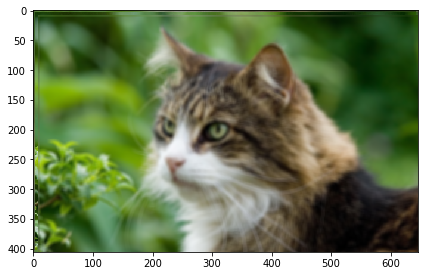

In [14]:
%%time
imshow(gauss_filter(img,7,19))

In [15]:
def svertka_filter(img, matrix):
    n = len(matrix)
    m = len(matrix)
    img2 = dobavkaIzobrazheniya(img, n//2, m//2)   
    
    r = svertka_filterAlgoritm(img2[:,:,0],matrix)
    g = svertka_filterAlgoritm(img2[:,:,1],matrix)
    b = svertka_filterAlgoritm(img2[:,:,2],matrix)
    
    return np.dstack((r,g,b))

In [16]:
def svertka_filterAlgoritm(channel, matr):
    n = len(matr)
    div = 0
    for h in range(n):
        for f in range(n):
            div+=matr[h][f]
    sum = 0
    ret = copy.copy(channel)
    height = channel.shape[0]
    width = channel.shape[1]
    for i in range(height-n//2-(n-1)): #вычитаем эти штуки чтобы не выходил массив за пределы
        for j in range(width-n//2-(n-1)):
            for k in range(n):
                for l in range(n):
                   sum+=channel[i+k][j+l]*matr[k][l]
            ret[i+k+n//2][j+l+n//2]=sum*(1/div)
            sum = 0
    return ret

In [17]:
svertka1 = [[-1, -1, -1],[-1,9,-1],[-1, -1, -1]]
svertka1

[[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]

In [19]:
svertka2 = [[0.5, 0.75, 0.5],[0.75,1.0,0.75],[0.5, 0.75, 0.5]]
svertka2

[[0.5, 0.75, 0.5], [0.75, 1.0, 0.75], [0.5, 0.75, 0.5]]

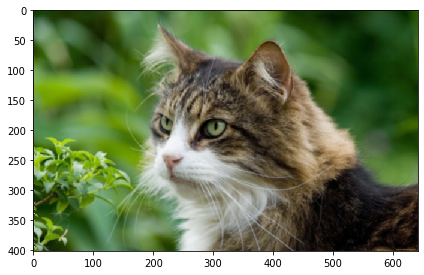

In [20]:
imshow(svertka_filter(img,svertka2))

In [21]:
svertka3 = [[0.000789, 0.006581, 0.013347, 0.006581, 0.000789],[0.006581,0.054901,0.111345,0.054901,0.006581],[0.013347, 0.111345, 0.225821,0.111345,0.013347],[0.006581,0.054901,0.111345,0.054901,0.006581],[0.000789, 0.006581, 0.013347, 0.006581, 0.000789]]
svertka3

[[0.000789, 0.006581, 0.013347, 0.006581, 0.000789],
 [0.006581, 0.054901, 0.111345, 0.054901, 0.006581],
 [0.013347, 0.111345, 0.225821, 0.111345, 0.013347],
 [0.006581, 0.054901, 0.111345, 0.054901, 0.006581],
 [0.000789, 0.006581, 0.013347, 0.006581, 0.000789]]

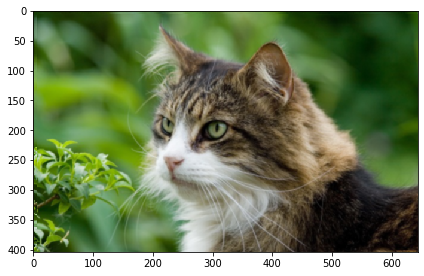

In [22]:
imshow(svertka_filter(img,svertka3))

In [23]:
sobel = [[-1,-1, -1],[0,0,0],[1, 1, 1]]
sobel

[[-1, -1, -1], [0, 0, 0], [1, 1, 1]]

In [24]:
#imshow(svertka_filter(img,sobel))

In [35]:
def border_image(img, method):
    previttGy = [[-1,-1, -1],[0,0,0],[1, 1, 1]]
    previttGx = [[-1,0, 1],[-2,0,2],[-1, 0, 1]]
    sobelGy = [[-1,-2, -1],[0,0,0],[1, 2, 1]]
    sobelGx = [[-1,0, 1],[-2,0,2],[-1, 0, 1]]
    if method==1:
        matrGy = previttGy
        matrGx = previttGx
    else:
        matrGy = sobelGy
        matrGx = sobelGx  
    n = len(matrGy)    
    channel = img[:,:,0]
    sumGy = 0
    sumGx = 0
    ret = copy.copy(channel)
    height = channel.shape[0]
    width = channel.shape[1]
    for i in range(height-n//2-(n-1)): #вычитаем эти штуки чтобы не выходил массив за пределы
        for j in range(width-n//2-(n-1)):
            for k in range(n):
                for l in range(n):
                    sumGy+=channel[i+k][j+l]*matrGy[k][l]
                    sumGx+=channel[i+k][j+l]*matrGx[k][l]                
            ret[i+k+n//2][j+l+n//2]=math.sqrt(sumGy**2+sumGx**2)
            sumGy = 0
            sumGx = 0
    return ret

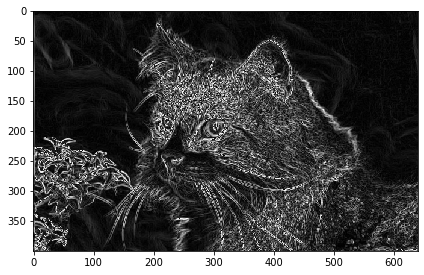

In [34]:
imshow(border_image(img,1))

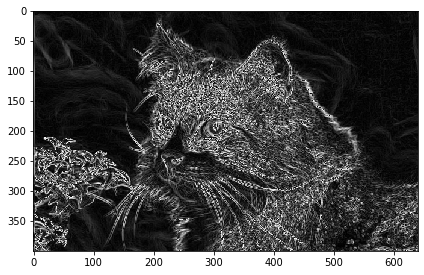

In [36]:
imshow(border_image(img,2))